## Creating Dataset

In [ ]:
!pip install ndjson
!pip install altair vega_datasets
!pip install -U imbalanced-learn

In [1]:
import altair
import ndjson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1
Read the video game review data. Take a look at the text of the reviews and the ratings, which you will work with in this milestone.
Note that your data is not pure JSON, but new line delimited JSON. To be able to read it, install and import ndjson.

In [2]:
with open('Video_Games_5.json') as f:
    data = ndjson.load(f)

In [3]:
type(data)

list

In [4]:
len(data)

497577

In [5]:
data[:1]

[{'overall': 5.0,
  'verified': True,
  'reviewTime': '10 17, 2015',
  'reviewerID': 'A1HP7NVNPFMA4N',
  'asin': '0700026657',
  'reviewerName': 'Ambrosia075',
  'reviewText': "This game is a bit hard to get the hang of, but when you do it's great.",
  'summary': "but when you do it's great.",
  'unixReviewTime': 1445040000}]

In [6]:
d = pd.DataFrame.from_dict(data)
d.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 42.2+ MB


# 2 & 3
Create a plot of the ratings of the product. Study the distribution of the five categories.

In [8]:
df = d.copy()

In [9]:
df.overall.value_counts()

5.0    299759
4.0     93654
3.0     49146
1.0     30883
2.0     24135
Name: overall, dtype: int64

In [10]:
df.describe()

,overall,unixReviewTime
count,497577.000000,4.975770e+05
mean,4.220456,1.367848e+09
std,1.185424,1.224113e+08
min,1.000000,9.398592e+08
25%,4.000000,1.316563e+09
50%,5.000000,1.410221e+09
75%,5.000000,1.452384e+09
max,5.000000,1.538438e+09


In [11]:
df.describe(include=[np.object])

,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,vote,style,image
count,497577,497577,497577,497501,497419,497468,107793,289237,3634
unique,6847,55223,17408,45943,401498,284302,449,2323,3467
top,"12 29, 2014",A3V6Z4RCDGRC44,B00178630A,Amazon Customer,good,Five Stars,2,{'Format:': ' Video Game'},[https://images-na.ssl-images-amazon.com/image...
freq,528,815,1381,15731,2302,85056,30860,129039,4


<AxesSubplot:>

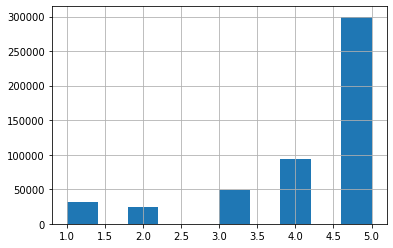

In [12]:
df.overall.hist()

## 4
Take a random sample of the reviews by selecting 1500 reviews with rating 1, 500-500-500 reviews with ratings 2, 3, 4, and 1500 reviews with rating 5. This way you get a smaller balanced corpus, on which you will during Milestones 2-4.
It is recommended to use imblearn.under_sampling.RandomUnderSampler from the imbalanced-learn package, which should be first installed, then imported.
If you want to get identical results that are provided as a sample solution, use 42 as a random state.

In [13]:
df_rating_1 = df.loc[df['overall']==1,:].sample(n=1500)
df_rating_2 = df.loc[df['overall']==2,:].sample(n=500)
df_rating_3 = df.loc[df['overall']==3,:].sample(n=500)
df_rating_4 = df.loc[df['overall']==4,:].sample(n=500)
df_rating_5 = df.loc[df['overall']==5,:].sample(n=1500)

In [14]:
frames =[df_rating_1,df_rating_2,df_rating_3,df_rating_4,df_rating_5]
df_sample = pd.concat(frames,axis=0)
df_sample.shape

(4500, 12)

<AxesSubplot:>

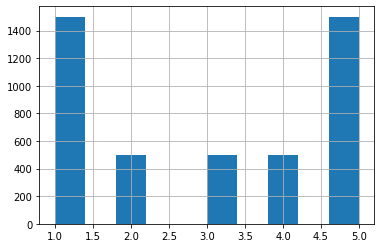

In [15]:
df_sample.overall.hist()

### 5 
Take a random sample of the reviews by selecting 100,000 reviews. This way you get a bigger representative corpus, on which you will work in Milestones 4 and 5.

In [16]:
df_sample_2 = df.sample(n=100000)

### 6
Export your corpora to two separate .csv files. Both of your tables should contain a column for the reviews and a column for the ratings. From now on we call the review text of the JSON key “reviews” and the overall key “ratings.” Name your corpora small_corpus and big_corpus.

In [18]:
df_sample.reset_index(inplace=True)
df_sample_2.reset_index(inplace=True)

In [19]:
df_sample.head()

,index,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,169136,1.0,False,"11 20, 2010",A1IKVUK2Z8YHEY,B001BC948U,yokanyabuta,"I bought this from a Gamestop, and the guy rav...",One of the worst games I've ever played,1290211200,4,{'Platform:': ' Xbox 360'},NaN
1,291742,1.0,True,"08 1, 2017",A1QPSY6D9YS0SQ,B00BGA9X9W,luis ortiz,bad,One Star,1501545600,NaN,{'Color:': ' Black'},NaN
2,348778,1.0,False,"04 26, 2015",ABZMFC3Y7898P,B00J6DQI62,Nicholas Collier,"Actually, this is worse than that. Just a lazy...",Oh look...Superman 64.,1430006400,NaN,{'Platform:': ' Nintendo Wii U'},NaN
3,204281,1.0,False,"09 24, 2014",ALBZ1APWQUZ9X,B002I096Q4,Matt C,I preordered the limited edition of this game ...,Overhyped,1411516800,50,{'Format:': ' Video Game'},NaN
4,44661,1.0,False,"07 10, 2015",A34PTD2BPXIXFI,B00008URUF,Laurie Mcdougall,Normally It would take me DAYS to complete Don...,Too easy compared to the Super Nintendo version,1436486400,NaN,NaN,NaN


In [20]:
df_sample.drop('index',axis=1,inplace=True)
df_sample_2.drop('index',axis=1,inplace=True)

In [21]:
small_corpus = df_sample
big_corpus = df_sample_2

In [22]:
small_corpus.to_csv('small_corpus.csv')
big_corpus.to_csv('big_corpus.csv')